In [5]:
# This is query for the Assortative Coefficient template
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [6]:
# Path for all the results
path="/mnt/indexer-build/migrated_data/curated/assortativity_coeff/"
path_casper="/mnt/indexer-build/migrated_data/casper_data/curated/assortativity_coefficient/"

In [7]:
def extractorYear(year):
    return(int(str(year)[:4]))

def extractorWeek(year):
    return(int(str(year)[4:]))

In [8]:
all_files = glob.glob(path + "/*/*.csv")
all_files_casper = glob.glob(path_casper + "/*/*.csv")

li = []
li_casper = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

for filename in all_files_casper:
    df_one = pd.read_csv(filename, index_col=None, header=0)
    li_casper.append(df_one)

frame = pd.concat(li, axis=0, ignore_index=True)
frame_casper = pd.concat(li_casper, axis=0, ignore_index=True)

In [9]:
frame_casper["year"]=frame_casper.time_week.apply(extractorYear)
frame_casper["week"]=frame_casper.time_week.apply(extractorWeek)
final2 = frame_casper.sort_values(by=['year','week'])

In [10]:
frame["year"]=frame.time_week.apply(extractorYear)
frame["week"]=frame.time_week.apply(extractorWeek)
final1 = frame.sort_values(by=['year','week'])

In [11]:
extra = final1[((final1.year == 2018) & (final1.week < 26)) | ((final1.year == 2022) & (final1.week > 34))]
extra

,assortative_coeff,time_week,year,week
164,-0.464289,20181,2018,1
145,-0.284762,202252,2022,52


In [12]:
extra2 = final2[((final2.year == 2018) & (final2.week < 26)) | ((final2.year == 2022) & (final2.week > 34))]
extra2

,max_count,time_week,year,week
35,-0.579263,202235,2022,35
1,-0.475150,202236,2022,36
60,-0.483706,202237,2022,37
30,-0.496553,202238,2022,38
53,-0.480926,202239,2022,39
22,-0.527516,202240,2022,40
8,-0.488764,202241,2022,41
50,-0.545140,202242,2022,42
23,-0.529991,202243,2022,43
18,-0.515115,202252,2022,52


In [13]:
df = pd.merge(final1, extra, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
df2 = pd.merge(final2, extra2, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

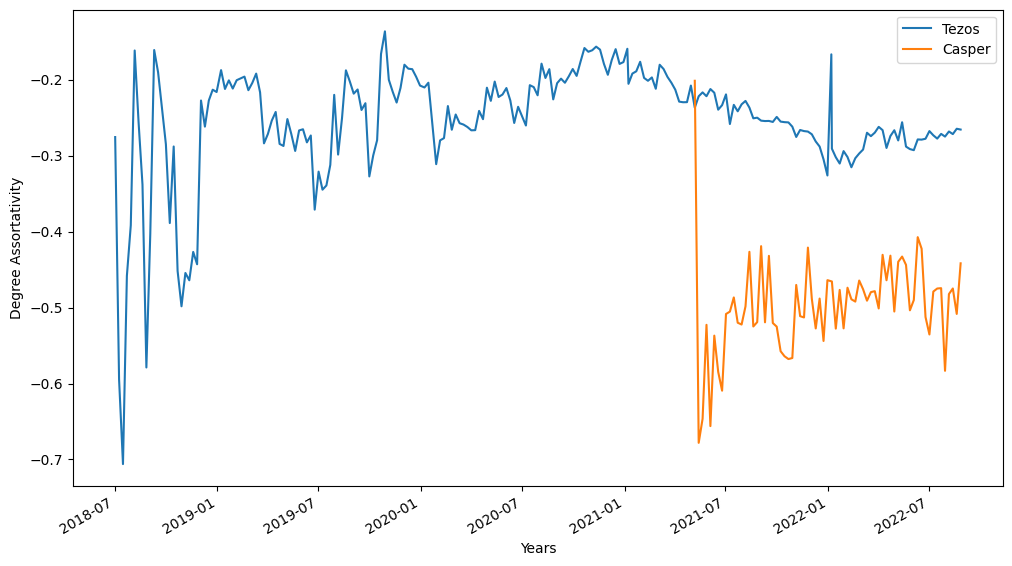

In [15]:
# Determine the date
df['date'] = pd.to_datetime(df.assign(day=1, month=1)[['year', 'month', 'day']])+pd.to_timedelta(df.week*7, unit='days')
df2['date'] = pd.to_datetime(df2.assign(day=1, month=1)[['year', 'month', 'day']])+pd.to_timedelta(df2.week*7, unit='days')

# Plot
fig, ax = plt.subplots()
df.plot(x='date', y='assortative_coeff', ax=ax, figsize=(12,7))
df2.plot(x='date', y='max_count', ax=ax)
ax.set_xlabel('Years')
ax.set_ylabel('Degree Assortativity')
ax.legend(['Tezos', 'Casper'])